In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [2]:
df = pd.read_csv('data_decision_tree_bt.csv')
df.head()

,TT,DoHaiLong,LoaiKhachHang,Tuoi,LoaiHinh,DoTrePhut,GheNgoi,ThucAn,GateLocation,DichVuGuiXe,BauKhongKhiTranDau,ChatLuongTranDau,TraiNghiemDatVeOnline,ChatLuongCacDichVuDiKem,DoAnToan,ThoiTiet,SuSachSe,FanDoiNha,ThietKeLoiDi
0,0,Không Hài Lòng,KH Bình Thường,29,Đi Cùng Gia Đình/Bạn Bè,15.0,5,5,4,5,2,5,1,5,5,4,5,4,5
1,1,Không Hài Lòng,KH Trung Thành,44,Đi Cùng Gia Đình/Bạn Bè,0.0,4,5,5,3,1,4,3,4,3,3,2,3,5
2,2,Hài Lòng,KH Trung Thành,48,Đi Cùng Gia Đình/Bạn Bè,0.0,5,2,1,4,2,5,4,5,4,4,4,4,3
3,3,Hài Lòng,KH Bình Thường,45,Đi Cùng Gia Đình/Bạn Bè,0.0,5,5,4,3,2,4,3,5,5,5,5,5,3
4,4,Không Hài Lòng,KH Trung Thành,49,Đi Cá Nhân,0.0,4,4,2,4,1,5,4,5,4,1,4,2,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127282 entries, 0 to 127281
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   TT                       127282 non-null  int64  
 1   DoHaiLong                127282 non-null  object 
 2   LoaiKhachHang            127282 non-null  object 
 3   Tuoi                     127282 non-null  int64  
 4   LoaiHinh                 127282 non-null  object 
 5   DoTrePhut                126894 non-null  float64
 6   GheNgoi                  127282 non-null  int64  
 7   ThucAn                   127282 non-null  int64  
 8   GateLocation             127282 non-null  int64  
 9   DichVuGuiXe              127282 non-null  int64  
 10  BauKhongKhiTranDau       127282 non-null  int64  
 11  ChatLuongTranDau         127282 non-null  int64  
 12  TraiNghiemDatVeOnline    127282 non-null  int64  
 13  ChatLuongCacDichVuDiKem  127282 non-null  int64  
 14  DoAn

In [5]:
print(df['DoHaiLong'].unique())
print(df['LoaiKhachHang'].unique())
print(df['LoaiHinh'].unique())

['Không Hài Lòng' 'Hài Lòng']
['KH Bình Thường' 'KH Trung Thành']
['Đi Cùng Gia Đình/Bạn Bè' 'Đi Cá Nhân']


In [6]:
df.isnull().sum()

TT                           0
DoHaiLong                    0
LoaiKhachHang                0
Tuoi                         0
LoaiHinh                     0
DoTrePhut                  388
GheNgoi                      0
ThucAn                       0
GateLocation                 0
DichVuGuiXe                  0
BauKhongKhiTranDau           0
ChatLuongTranDau             0
TraiNghiemDatVeOnline        0
ChatLuongCacDichVuDiKem      0
DoAnToan                     0
ThoiTiet                     0
SuSachSe                     0
FanDoiNha                    0
ThietKeLoiDi                 0
dtype: int64

In [7]:
df_clean = df.dropna()
df_clean.isnull().sum()

TT                         0
DoHaiLong                  0
LoaiKhachHang              0
Tuoi                       0
LoaiHinh                   0
DoTrePhut                  0
GheNgoi                    0
ThucAn                     0
GateLocation               0
DichVuGuiXe                0
BauKhongKhiTranDau         0
ChatLuongTranDau           0
TraiNghiemDatVeOnline      0
ChatLuongCacDichVuDiKem    0
DoAnToan                   0
ThoiTiet                   0
SuSachSe                   0
FanDoiNha                  0
ThietKeLoiDi               0
dtype: int64

In [10]:
df_cleaned_encoded = pd.get_dummies(df_clean, drop_first=True, dtype=int)
df_cleaned_encoded.columns

Index(['TT', 'Tuoi', 'DoTrePhut', 'GheNgoi', 'ThucAn', 'GateLocation',
       'DichVuGuiXe', 'BauKhongKhiTranDau', 'ChatLuongTranDau',
       'TraiNghiemDatVeOnline', 'ChatLuongCacDichVuDiKem', 'DoAnToan',
       'ThoiTiet', 'SuSachSe', 'FanDoiNha', 'ThietKeLoiDi',
       'DoHaiLong_Không Hài Lòng', 'LoaiKhachHang_KH Trung Thành',
       'LoaiHinh_Đi Cùng Gia Đình/Bạn Bè'],
      dtype='object')

In [11]:
df_cleaned_encoded.head(5)

,TT,Tuoi,DoTrePhut,GheNgoi,ThucAn,GateLocation,DichVuGuiXe,BauKhongKhiTranDau,ChatLuongTranDau,TraiNghiemDatVeOnline,ChatLuongCacDichVuDiKem,DoAnToan,ThoiTiet,SuSachSe,FanDoiNha,ThietKeLoiDi,DoHaiLong_Không Hài Lòng,LoaiKhachHang_KH Trung Thành,LoaiHinh_Đi Cùng Gia Đình/Bạn Bè
0,0,29,15.0,5,5,4,5,2,5,1,5,5,4,5,4,5,1,0,1
1,1,44,0.0,4,5,5,3,1,4,3,4,3,3,2,3,5,1,1,1
2,2,48,0.0,5,2,1,4,2,5,4,5,4,4,4,4,3,0,1,1
3,3,45,0.0,5,5,4,3,2,4,3,5,5,5,5,5,3,0,0,1
4,4,49,0.0,4,4,2,4,1,5,4,5,4,1,4,2,4,1,1,0


In [12]:
df_cleaned_encoded = df_cleaned_encoded.rename(columns={
                    'DoHaiLong_Không Hài Lòng': 'DoHaiLong',
                    'LoaiKhachHang_KH Trung Thành': 'LoaiKhachHang',
                    'LoaiHinh_Đi Cùng Gia Đình/Bạn Bè': 'LoaiHinh'
                    })
df_cleaned_encoded.columns

Index(['TT', 'Tuoi', 'DoTrePhut', 'GheNgoi', 'ThucAn', 'GateLocation',
       'DichVuGuiXe', 'BauKhongKhiTranDau', 'ChatLuongTranDau',
       'TraiNghiemDatVeOnline', 'ChatLuongCacDichVuDiKem', 'DoAnToan',
       'ThoiTiet', 'SuSachSe', 'FanDoiNha', 'ThietKeLoiDi', 'DoHaiLong',
       'LoaiKhachHang', 'LoaiHinh'],
      dtype='object')

In [13]:
Y = df_cleaned_encoded['DoHaiLong']
X = df_cleaned_encoded.drop(columns=['DoHaiLong', 'TT'])
print(Y.shape, X.shape)

(126894,) (126894, 17)


In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, Y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [15]:
tree_pred = tree.predict(X_test)
accuracy = accuracy_score(Y_test, tree_pred)
f1 = f1_score(Y_test, tree_pred)
recall = recall_score(Y_test, tree_pred)
precision = precision_score(Y_test, tree_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')

Accuracy: 0.8892
F1 Score: 0.8760
Recall: 0.8752
Precision: 0.8769


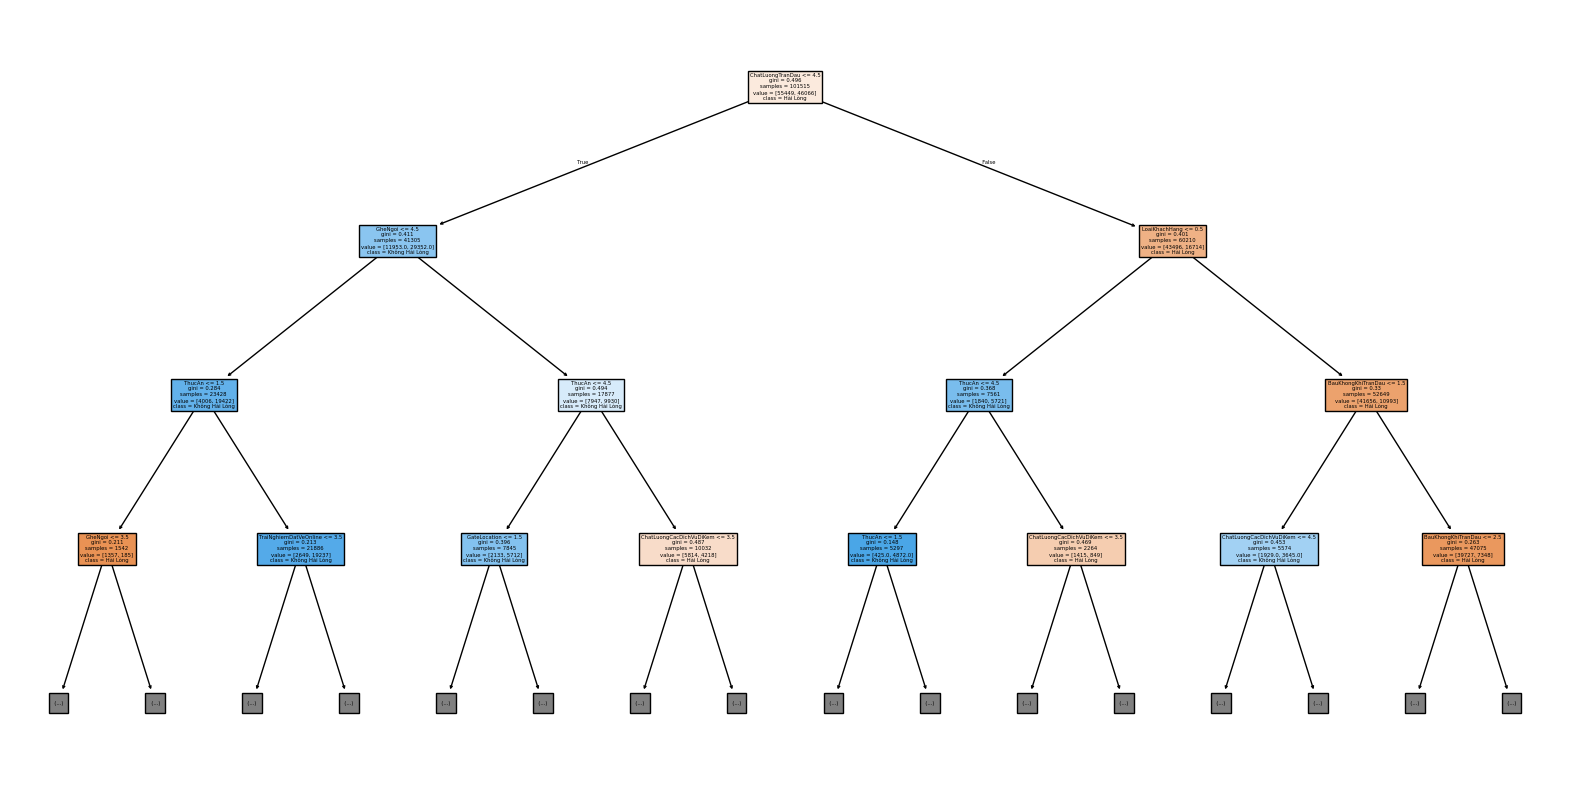

In [19]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=X.columns, class_names=['Hài Lòng', 'Không Hài Lòng'], max_depth=3)
plt.show()  

In [20]:
X_test_10 = X_test.iloc[:10]
print("Predictions for first 10 samples in test set:")
predictions_10 = tree.predict(X_test_10)
print(predictions_10)
print("Actual labels for first 10 samples in test set:")
print(Y_test.iloc[:10].values)

Predictions for first 10 samples in test set:
[0 1 1 0 0 1 0 0 1 0]
Actual labels for first 10 samples in test set:
[0 1 1 0 0 1 0 0 1 0]


In [21]:
tree = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=10, min_samples_leaf=5)
tree.fit(X_train, Y_train)
tree_pred = tree.predict(X_test)
accuracy = accuracy_score(Y_test, tree_pred)
f1 = f1_score(Y_test, tree_pred)
recall = recall_score(Y_test, tree_pred)
precision = precision_score(Y_test, tree_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')

Accuracy: 0.8469
F1 Score: 0.8188
Recall: 0.7732
Precision: 0.8700


In [23]:
from sklearn.model_selection import GridSearchCV
hyper_params = {
    'max_depth': [3, 5, 7, 10, 15, None],
    'min_samples_split': [2, 5, 10, 20, 45],
    'min_samples_leaf': [2, 5, 10, 20, 45]
    }

scoring = {'accuracy' : 'accuracy', 'f1' : 'f1', 'recall' : 'recall', 'precision' : 'precision'}
tree = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator=tree, param_grid=hyper_params, scoring=scoring, refit='accuracy', cv=5)
grid_search.fit(X_train, Y_train)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'max_depth': [3, 5, ...], 'min_samples_leaf': [2, 5, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,"{'accuracy': 'accuracy', 'f1': 'f1', 'precision': 'precision', 'recall': 'recall'}"
,n_jobs,None
,refit,'accuracy'
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [24]:
best_tree = grid_search.best_estimator_
tree_pred = best_tree.predict(X_test)
accuracy = accuracy_score(Y_test, tree_pred)
f1 = f1_score(Y_test, tree_pred)
recall = recall_score(Y_test, tree_pred)
precision = precision_score(Y_test, tree_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')

Accuracy: 0.9047
F1 Score: 0.8931
Recall: 0.8901
Precision: 0.8961


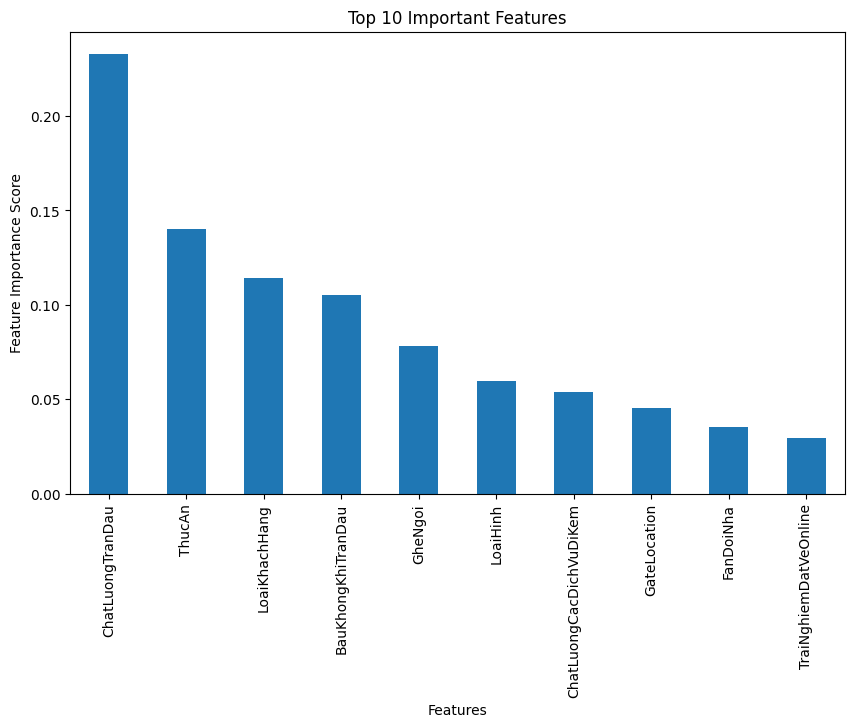

In [26]:
important_features = best_tree.feature_importances_
important_features = pd.Series(important_features, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
important_features.head(10).plot(kind='bar')
plt.title('Top 10 Important Features')
plt.ylabel('Feature Importance Score')
plt.xlabel('Features')
plt.show()

In [25]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, Y_train)
forest_pred = forest.predict(X_test)

accuracy = accuracy_score(Y_test, forest_pred)
f1 = f1_score(Y_test, forest_pred)
recall = recall_score(Y_test, forest_pred)
precision = precision_score(Y_test, forest_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')

Accuracy: 0.9193
F1 Score: 0.9093
Recall: 0.9047
Precision: 0.9139
